In [1]:
import os
import boto3
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
s3 = boto3.client("s3")

filename = "weight-height.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/weight-height.csv", filename)
data = pd.read_csv(filename)

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


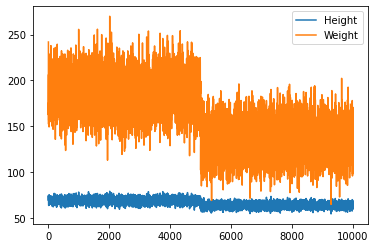

In [6]:
data.plot()

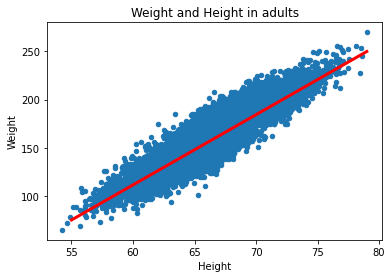

In [10]:
data.plot.scatter( x='Height', y='Weight',
         title='Weight and Height in adults')
plt.plot([55,79],[75,250],color='red',linewidth=3)

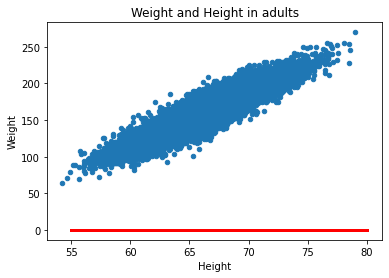

In [8]:
def line(x, w=0, b=0):
    return x * w + b

x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=0)

data.plot.scatter( x='Height', y='Weight',
         title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

# Cost Function

In [9]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [11]:
x = data['Height'].values
y_true = data['Weight'].values

In [12]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [13]:
y_pred = line(x)
mean_squared_error(y_true, y_pred)

27093.83757456157

Text(0.5, 0, 'b')

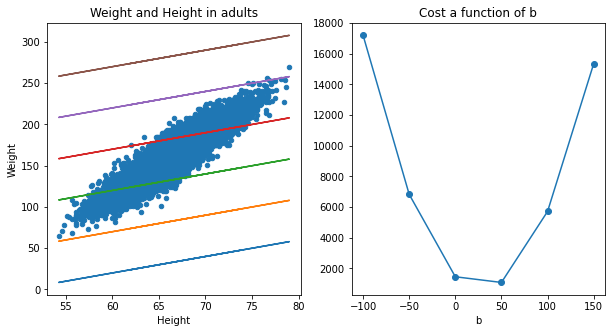

In [18]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(121)
data.plot.scatter(x='Height',
                  y='Weight',
                  title='Weight and Height in adults',
                  ax=ax1)

# explore cost function for a few values of b
bbs = np.array([-100,-50, 0, 50, 100, 150])
mses = []

for b in bbs:
    y_pred = line(x, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)
    
# plot 2: cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost a function of b')
plt.xlabel('b')

# Linear Regression with Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(lr=0.5),'mean_squared_error')

In [24]:
model.fit(x,y_true,epochs=8)




Epoch 1/8





10000/10000 [==============================] - 3s 271us/step - loss: 635.5767
Epoch 2/8
10000/10000 [==============================] - 0s 23us/step - loss: 558.5406
Epoch 3/8
10000/10000 [==============================] - 0s 23us/step - loss: 502.7280
Epoch 4/8
10000/10000 [==============================] - 0s 24us/step - loss: 466.2996
Epoch 5/8
10000/10000 [==============================] - 0s 23us/step - loss: 429.6453
Epoch 6/8
10000/10000 [==============================] - 0s 24us/step - loss: 392.1084
Epoch 7/8
10000/10000 [==============================] - 0s 23us/step - loss: 361.4071
Epoch 8/8
10000/10000 [==============================] - 0s 23us/step - loss: 345.8011


In [25]:
y_pred = model.predict(x)

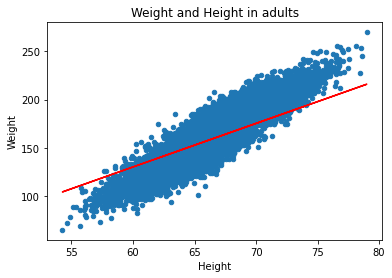

In [26]:
data.plot.scatter(x='Height',
                  y='Weight',
                  title='Weight and Height in adults')
plt.plot(x,y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[4.522717]], dtype=float32)

In [29]:
B

array([-141.26901], dtype=float32)

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y_true,test_size=0.2)

In [33]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0,0] = 0.0
B[0] = 0.0
model.set_weights((W,B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The MSE on Train set is:\t{:0.3f}".format(mse(y_train_pred,y_train)))
print("The MSE on Test set is:\t{:0.3f}".format(mse(y_test_pred,y_test)))

The MSE on Train set is:	238.746
The MSE on Test set is:	236.292


In [42]:
from sklearn.metrics import r2_score

In [43]:
print("R2 score on Train set is:\t{:0.3f}".format(r2_score(y_train_pred,y_train)))
print("R2 score on Test set is:\t{:0.3f}".format(r2_score(y_test_pred,y_test)))

R2 score on Train set is:	0.711
R2 score on Test set is:	0.702
